# NOTEBOOK MUST BE RUN IN ENV: netflix_proj_env

In [1]:
#Confirm in the correct env
!conda env list

# conda environments:
#
                         C:\Program Files\Orange
base                     C:\ProgramData\Anaconda3
ChatDev_conda_env        C:\Users\PhillipRashaad\.conda\envs\ChatDev_conda_env
PandasProfileEnv         C:\Users\PhillipRashaad\.conda\envs\PandasProfileEnv
SMOP_env                 C:\Users\PhillipRashaad\.conda\envs\SMOP_env
autogen_autobuild_env     C:\Users\PhillipRashaad\.conda\envs\autogen_autobuild_env
autogen_studio_env       C:\Users\PhillipRashaad\.conda\envs\autogen_studio_env
automemgpt_env           C:\Users\PhillipRashaad\.conda\envs\automemgpt_env
classy_env               C:\Users\PhillipRashaad\.conda\envs\classy_env
crewai_env               C:\Users\PhillipRashaad\.conda\envs\crewai_env
crewai_newsletter_env     C:\Users\PhillipRashaad\.conda\envs\crewai_newsletter_env
crewai_poetry_env        C:\Users\PhillipRashaad\.conda\envs\crewai_poetry_env
crewai_readme_env        C:\Users\PhillipRashaad\.conda\envs\crewai_readme_env
cupy_tut                

# 1. LOAD DATA

In [2]:
#Load ENHANCED netflix engagement data with is_original column
import pandas as pd

enhanced_df = pd.read_csv("08 - FORMATTED_ENHANCED_DATA - Netflix_Engagement_Date.csv")

print(enhanced_df.shape)

enhanced_df.head()

(14608, 8)


,api_data_id,Clean_Title,Title_Counts,Clean_Title_Prompt,is_original,Clean_Title_Char_Len,Content_Type_Prompt,content_type
0,api-0-No-Series,naruto shippuden,21,Is title 'naruto shippuden' original Netflix c...,No,16,"Is Netflix title 'naruto shippuden' a Series, ...",Series
1,api-1-No-Series,greys anatomy,19,Is title 'greys anatomy' original Netflix cont...,No,13,"Is Netflix title 'greys anatomy' a Series, Mov...",Series
2,api-2-No-Series,gogglebox,16,Is title 'gogglebox' original Netflix content?,No,9,"Is Netflix title 'gogglebox' a Series, Movie, ...",Series
3,api-3-No-Series,heartland 2007,16,Is title 'heartland 2007' original Netflix con...,No,14,"Is Netflix title 'heartland 2007' a Series, Mo...",Series
4,api-4-No-Series,its always sunny in philadelphia,15,Is title 'its always sunny in philadelphia' or...,No,32,Is Netflix title 'its always sunny in philadel...,Series


In [3]:
#Load ENHANCED netflix engagement data with is_original column
import pandas as pd

clean_df = pd.read_csv("03 - CLEANED_DATA - Netflix_Engagement_Data.csv")

print(clean_df.shape)

clean_df.head()

(18214, 8)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0,True,15
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0,True,14
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0,True,9
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0,True,9
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN,False,34


# 2. MERGE DATA

In [4]:
import pandas as pd

# Assuming enhanced_df and clean_df are already defined

# Perform the left join
merged_df = pd.merge(clean_df, enhanced_df, on='Clean_Title', how='left')

# Display the result
print(merged_df.shape)

merged_df.head()

(18214, 15)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len_x,api_data_id,Title_Counts,Clean_Title_Prompt,is_original,Clean_Title_Char_Len_y,Content_Type_Prompt,content_type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0,True,15,api-3689-No-Series,1.0,Is title 'the night agent' original Netflix co...,No,15.0,"Is Netflix title 'the night agent' a Series, M...",Series
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0,True,14,api-5660-Yes-Series,2.0,Is title 'ginny georgia' original Netflix con...,Yes,14.0,"Is Netflix title 'ginny georgia' a Series, Mo...",Series
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0,True,9,api-6376-No-Series,1.0,Is title 'the glory' original Netflix content?,No,9.0,"Is Netflix title 'the glory' a Series, Movie, ...",Series
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0,True,9,api-4010-Yes-Series,1.0,Is title 'wednesday' original Netflix content?,Yes,9.0,"Is Netflix title 'wednesday' a Series, Movie, ...",Series
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN,False,34,api-5752-Yes-Series,1.0,Is title 'queen charlotte a bridgerton story' ...,Yes,34.0,Is Netflix title 'queen charlotte a bridgerton...,Series


In [5]:
#save to cvs
merged_df.to_csv("10 - MERGED_DATA - Netflix_Engagement_Data.csv")

In [6]:
#View merged data info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   18214 non-null  object 
 1   available_globally      18214 non-null  object 
 2   release_date            4855 non-null   object 
 3   hours_viewed            18214 non-null  int64  
 4   Clean_Title             18197 non-null  object 
 5   Season_Num              5834 non-null   float64
 6   Contains_Numbers        18214 non-null  bool   
 7   Clean_Title_Char_Len_x  18214 non-null  int64  
 8   api_data_id             17210 non-null  object 
 9   Title_Counts            17210 non-null  float64
 10  Clean_Title_Prompt      17210 non-null  object 
 11  is_original             17165 non-null  object 
 12  Clean_Title_Char_Len_y  17210 non-null  float64
 13  Content_Type_Prompt     17210 non-null  object 
 14  content_type            16494 non-null

In [7]:
#View merged data Nan count
merged_df.isna().sum()

title                         0
available_globally            0
release_date              13359
hours_viewed                  0
Clean_Title                  17
Season_Num                12380
Contains_Numbers              0
Clean_Title_Char_Len_x        0
api_data_id                1004
Title_Counts               1004
Clean_Title_Prompt         1004
is_original                1049
Clean_Title_Char_Len_y     1004
Content_Type_Prompt        1004
content_type               1720
dtype: int64

# 3. WEBSCRAPE DATA TO EVALUATE LLN OUTPUTS
- Wikipedia Original Nextflix Content URL: https://en.wikipedia.org/wiki/List_of_Netflix_original_programming


**NOTE:** Any title listed on the url is Netflix Original content

In [8]:
import requests
from bs4 import BeautifulSoup

def scrape_tables_from_url(url, element='table'):
    """
    Scrapes all <table> elements from the given URL and stores them in a list.

    Parameters:
    - url (str): The URL to scrape tables from.

    Returns:
    - list: A list of BeautifulSoup objects representing each table found.
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Check for successful response
    if response.status_code != 200:
        return f"Failed to retrieve content from {url}, status code: {response.status_code}"

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all <table> elements in the HTML
    tables = soup.find_all(element)

    # Initialize a list to store the tables for later review
    table_list = []

    # Iterate over each table and append it to the table_list
    for table in tables:
        table_list.append(table)

    # Optionally, print the number of tables collected
    print(f'Collected {len(table_list)} tables.')

    return table_list




In [9]:
#THIS ONE
#Function to convert HTML table to dataframe

import pandas as pd
from bs4 import BeautifulSoup

def html_table_to_dataframe(html):
    #Convert to string
    html = str(html)

    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table', class_='wikitable sortable')

    if table is None:
        raise ValueError("Table not found in HTML content")

    # Attempting to find the first row of the table to extract headers
    first_row = table.find('tr')
    if first_row is None:
        raise ValueError("No rows found in the table")

    headers = [th.text.strip() for th in first_row.find_all('th')]

    data = []
    # Processing each row starting from the second one since we assume the first one contains headers
    for row in table.find_all('tr')[1:]:
        cells = row.find_all(['td', 'th'])  # This will include both td and th elements
        row_data = [cell.text.strip() for cell in cells if cell]
        if len(row_data) != len(headers):
            # Optionally handle the mismatch; for now, we'll just print a warning
            print(f"Warning: row with data {row_data} has a different number of columns than the headers")
        else:
            data.append(row_data)

    df = pd.DataFrame(data, columns=headers)
    return df


In [10]:
def webscrape_table_pipeline(wikipedia_url):
  #Webscrape URL for tables
  table_lst = scrape_tables_from_url(wikipedia_url)

  #empty list to capture table_dfs
  df_list = []

  #Loop though table list converting to df
  for table in table_lst:
    try:
      table_df = html_table_to_dataframe(table)
      print(table_df.shape, '\n\n')
      df_list.append(table_df)
    except:
      pass


  #output_df = pd.concat(df_list)

  return df_list


In [11]:
netflix_orig_url = 'https://en.wikipedia.org/wiki/List_of_Netflix_original_programming'

netflix_orig_url

'https://en.wikipedia.org/wiki/List_of_Netflix_original_programming'

In [12]:
#use pipeline function to create a list of dfs
netflix_orig_df_list = webscrape_table_pipeline(wikipedia_url=netflix_orig_url)

print('LEN: ',len(netflix_orig_df_list))
print('TYPE: ',type(netflix_orig_df_list))

netflix_orig_df_list[0]

Collected 96 tables.
(28, 6) 


(16, 6) 


(3, 6) 


(7, 7) 


(22, 7) 


(21, 6) 


(5, 6) 


(4, 6) 


(4, 6) 


(11, 6) 


(3, 6) 


(8, 6) 


(4, 6) 


(13, 6) 


(3, 6) 


(6, 6) 


(7, 6) 


(19, 6) 


(6, 6) 


(9, 6) 


(9, 7) 


(44, 7) 


(54, 7) 


(11, 7) 


(9, 8) 


(1, 5) 


(1, 7) 


(5, 8) 


(8, 9) 


(2, 9) 


(47, 3) 


(11, 3) 


(4, 3) 


(9, 3) 


(11, 3) 


(3, 3) 


(3, 3) 


(3, 3) 


(10, 3) 


(4, 3) 


(13, 3) 


(7, 3) 


(4, 3) 


(5, 3) 


(3, 3) 


(23, 3) 


(4, 3) 


(4, 3) 


(8, 4) 


(27, 4) 


(13, 4) 


(5, 5) 


(4, 7) 


(1, 4) 


(49, 2) 


LEN:  55
TYPE:  <class 'list'>


,Title,Genre,Premiere,Seasons,Runtime,Status
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025[1]
1,The Umbrella Academy,Superhero action,"February 15, 2019","3 seasons, 30 episodes",40–60 min,"Final season due to premiere on August 8, 2024..."
2,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025[1][5]
3,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final)[6][7]
4,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,Season 4 due to premiere in 2024[8][9]
5,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025[1][10]
6,Blood & Water,Teen drama,"May 20, 2020","4 seasons, 25 episodes",42–53 min,Pending
7,Bridgerton,Alternate historical romance,"December 25, 2020","3 seasons, 20 episodes",52–72 min,"Season 3 part 2 due to premiere on June 13, 20..."
8,Ginny & Georgia,Coming-of-age drama,"February 24, 2021","2 seasons, 20 episodes",52–62 min,Season 3 due to premiere in 2025[1] Renewed fo...
9,Sweet Tooth,Fantasy drama,"June 4, 2021","2 seasons, 16 episodes",37–57 min,"Final season due to premiere on June 6, 2024[1..."


In [13]:
import numpy as np
import pandas as pd

def format_netflix_dfs(netflix_orig_df_list):
    """
    Formats a list of Netflix DataFrames to ensure they all contain 'Title', 'Genre', and 'Premiere' columns.

    Parameters:
    - netflix_orig_df_list (list of pd.DataFrame): The list of DataFrames to format.

    Returns:
    - list: A list of formatted DataFrames with the specified columns.
    """
    format_netflix_df_list = []

    # Loop through df list pulling needed titles
    for df in netflix_orig_df_list:
        try:
            format_netflix_df_list.append(df[['Title', 'Genre', 'Premiere']])
        except KeyError as e:
            missing_column = str(e).split("'")[1]  # Extract the missing column name from the error message
            print(f"Adding {missing_column} to dataframe")
            df[missing_column] = np.nan
            format_netflix_df_list.append(df[['Title', 'Genre', 'Premiere']])

    print('TOTAL DATAFRAMES: ',len(format_netflix_df_list))

    #Concat into 1 df
    final_format_df = pd.concat(format_netflix_df_list)

    return final_format_df

In [14]:
#Use format function to merge intp one df
film_format_df = format_netflix_dfs(netflix_orig_df_list)

print(film_format_df.shape)

film_format_df.head()

Adding Genre to dataframe
Adding Genre to dataframe
Adding Genre to dataframe
Adding Premiere to dataframe
TOTAL DATAFRAMES:  55
(618, 3)


,Title,Genre,Premiere
0,Stranger Things,Science fiction horror,"July 15, 2016"
1,The Umbrella Academy,Superhero action,"February 15, 2019"
2,Virgin River,Romantic drama,"December 6, 2019"
3,The Witcher,Fantasy drama,"December 20, 2019"
4,Outer Banks,Coming-of-age drama,"April 15, 2020"


In [15]:
film_format_df['Title'].value_counts()[:20]

Title
Stranger Things                                 1
Jentry Chau vs. The Underworld[315][316]        1
Moonrise[304]                                   1
Tomb Raider: The Legend of Lara Croft[306]      1
Army of the Dead: Lost Vegas[308][309]          1
Beat & Motion[310][311]                         1
Lady Napoleon[312]                              1
The One Piece[313]                              1
Stranger Things: Tokyo[314]                     1
Mighty MonsterWheelies[78]                      1
Wereworld[320]                                  1
Astérix[317]                                    1
Horton Hears a Who![319]                        1
Mermaid Magic[320]                              1
One Fish, Two Fish, Red Fish, Blue Fish[319]    1
The Seven Bears[320]                            1
Untitled Rebel Moon series[321]                 1
Untitled The Witcher series[322][323]           1
Devil May Cry[301][302]                         1
Gundam: Requiem for Vengeance[299]          

In [16]:
from utils.netflix_data_cleaner_tools import remove_special_characters

#Use function to create clean title column
film_format_df['Clean_Title'] = film_format_df['Title'].apply(remove_special_characters)

print(film_format_df.shape)

film_format_df.head()

(618, 4)


,Title,Genre,Premiere,Clean_Title
0,Stranger Things,Science fiction horror,"July 15, 2016",stranger things
1,The Umbrella Academy,Superhero action,"February 15, 2019",the umbrella academy
2,Virgin River,Romantic drama,"December 6, 2019",virgin river
3,The Witcher,Fantasy drama,"December 20, 2019",the witcher
4,Outer Banks,Coming-of-age drama,"April 15, 2020",outer banks


In [17]:
from utils.netflix_data_cleaner_tools import remove_season

#Use function to create remove season info
film_format_df['Clean_Title'] = film_format_df['Clean_Title'].apply(remove_season)

print(film_format_df.shape)

film_format_df.head()

(618, 4)


,Title,Genre,Premiere,Clean_Title
0,Stranger Things,Science fiction horror,"July 15, 2016",stranger things
1,The Umbrella Academy,Superhero action,"February 15, 2019",the umbrella academy
2,Virgin River,Romantic drama,"December 6, 2019",virgin river
3,The Witcher,Fantasy drama,"December 20, 2019",the witcher
4,Outer Banks,Coming-of-age drama,"April 15, 2020",outer banks


In [22]:
#Create wiki is original column for easier analysis during merge
film_format_df['wiki_is_original'] = 'Yes'

print(film_format_df.shape)

film_format_df.head()

(618, 5)


,Title,Genre,Premiere,Clean_Title,wiki_is_original
0,Stranger Things,Science fiction horror,"July 15, 2016",stranger things,Yes
1,The Umbrella Academy,Superhero action,"February 15, 2019",the umbrella academy,Yes
2,Virgin River,Romantic drama,"December 6, 2019",virgin river,Yes
3,The Witcher,Fantasy drama,"December 20, 2019",the witcher,Yes
4,Outer Banks,Coming-of-age drama,"April 15, 2020",outer banks,Yes


In [23]:
#Confirm [] numbers are clear
film_format_df['Clean_Title'].value_counts()[:20]

Clean_Title
the influencer                              2
                                            2
cashero                                     2
stranger things tokyo                       1
devil may cry                               1
moonrise                                    1
tomb raider the legend of lara croft        1
army of the dead lost vegas                 1
beat  motion                                1
lady napoleon                               1
the one piece                               1
mighty monsterwheelies                      1
jentry chau vs the underworld               1
untitled stranger things animated series    1
astrix                                      1
horton hears a who                          1
mermaid magic                               1
one fish two fish red fish blue fish        1
the seven bears                             1
untitled rebel moon series                  1
Name: count, dtype: int64

In [24]:
#Save to csv
film_format_df.to_csv("11 - WIKIPEDIA - Netflix_Orig_Film.csv", index=False)

# 4. EVALUATION MERGE

In [25]:
print('LEFT: ',merged_df.shape)
print('RIGHT: ',film_format_df.shape)

LEFT:  (18214, 15)
RIGHT:  (618, 5)


In [27]:
import pandas as pd

# Assuming enhanced_df and clean_df are already defined

# Perform the left join
eval_merged_df = pd.merge(merged_df, film_format_df, on='Clean_Title', how='outer')

# Display the result
print(eval_merged_df.shape)

eval_merged_df.head()

(18684, 19)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len_x,api_data_id,Title_Counts,Clean_Title_Prompt,is_original,Clean_Title_Char_Len_y,Content_Type_Prompt,content_type,Title,Genre,Premiere,wiki_is_original
0,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1670,Comedy,"December 13, 2023",Yes
1,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992[382],Thriller,TBA,Yes
2,1 Kadın 1 Erkek: Season 1,No,NaN,500000.0,1 kadn 1 erkek,1.0,True,14.0,api-3476-No-Series,1.0,Is title '1 kadn 1 erkek' original Netflix con...,No,14.0,"Is Netflix title '1 kadn 1 erkek' a Series, Mo...",Series,NaN,NaN,NaN,NaN
3,10 Cloverfield Lane,No,NaN,1400000.0,10 cloverfield lane,NaN,True,19.0,api-3891-No-Movie,1.0,Is title '10 cloverfield lane' original Netfli...,No,19.0,Is Netflix title '10 cloverfield lane' a Serie...,Movie,NaN,NaN,NaN,NaN
4,10 Days of a Good Man // İyi Adamın 10 Günü,Yes,2023-03-03,21700000.0,10 days of a good man yi adamn 10 gn,NaN,True,37.0,api-10736-No-Movie,1.0,Is title '10 days of a good man yi adamn 10 g...,No,37.0,Is Netflix title '10 days of a good man yi ad...,Movie,NaN,NaN,NaN,NaN


In [29]:
#Save to csv
eval_merged_df.to_csv("12 - EVALUATION DATA - Netflix_Engagement_Data.csv", index=False)

# 5. Final Analysis
- NOTE: Only 145 records mapped between Wikipedia data and Model output data. Going to use this as a sample to evaluate model performance

In [2]:
#Load manual analysis data
analysis_df = pd.read_excel('14 - Manual Evaluation - Both_Models.xlsx')

# Display the result
print(analysis_df.shape)

analysis_df.head()

(145, 9)


,GPT-3.5_Validation,GPT-4_Validation,wiki_is_original,is_original - GPT-3.5,Clean_Title,Clean_Title_Prompt,Total,Comments,is_original - GPT-4
0,False,False,Yes,No,agency,Is title 'agency' original Netflix content?,1,"NOTE: No, ""Agency"" is a South Korean drama air...",No
1,False,False,Yes,No,alpha males,Is title 'alpha males' original Netflix content?,1,"NOTE: Yes, ""Alpha Males"" is a Spanish comedy s...",No
2,False,True,Yes,No,another self,Is title 'another self' original Netflix content?,1,NaN,Yes
3,False,True,Yes,No,baby fever,Is title 'baby fever' original Netflix content?,1,NaN,Yes
4,False,True,Yes,No,bad exorcist,Is title 'bad exorcist' original Netflix content?,3,"NOTE: The animated series titled ""Bad Exorcist...",Yes


In [3]:
analysis_df['GPT-3.5_Validation'].value_counts(normalize=True)

GPT-3.5_Validation
False    0.531034
True     0.468966
Name: proportion, dtype: float64

In [4]:
analysis_df['GPT-4_Validation'].value_counts(normalize=True)

GPT-4_Validation
True     0.965517
False    0.034483
Name: proportion, dtype: float64

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_gpt_validation_pie_chart(df, column_name):
    """
    Creates and displays a pie chart for the given column in the DataFrame
    which contains only True or False values.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to be visualized.
    """
    # Counting the True and False values
    validation_counts = df[column_name].value_counts()

    # Ensure the order of colors corresponds to True and False
    colors = ['#4CAF50' if val else '#FF5722' for val in validation_counts.index]

    # Creating the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(
        validation_counts, 
        labels=validation_counts.index.map({True: 'Correct', False: 'Incorrect'}), 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors, 
        shadow=True, 
        explode=(0.05, 0.05),  # Slightly separate the slices
        wedgeprops={'edgecolor': 'black'}
    )

    # Adding a legend and a title
    plt.legend(labels=validation_counts.index.map({True: 'Correct', False: 'Incorrect'}), loc='upper right')
    plt.title(column_name, fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the plot
    plt.show()


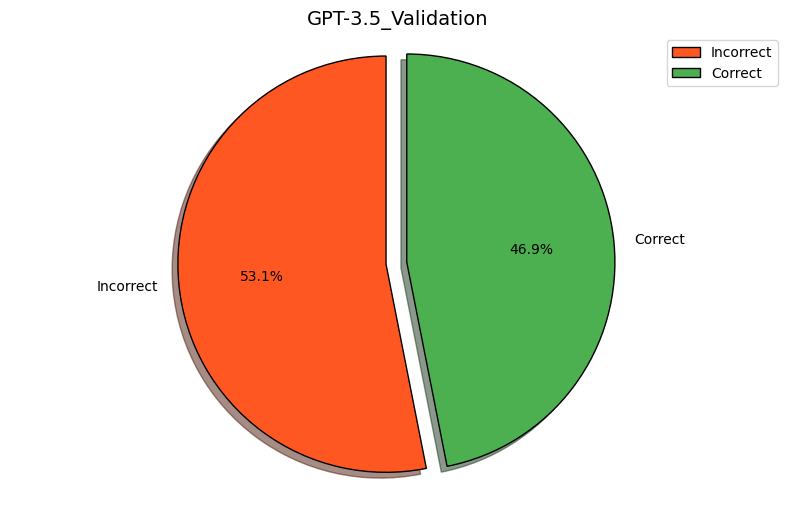

In [6]:
# Call the helper function
plot_gpt_validation_pie_chart(analysis_df, 'GPT-3.5_Validation')

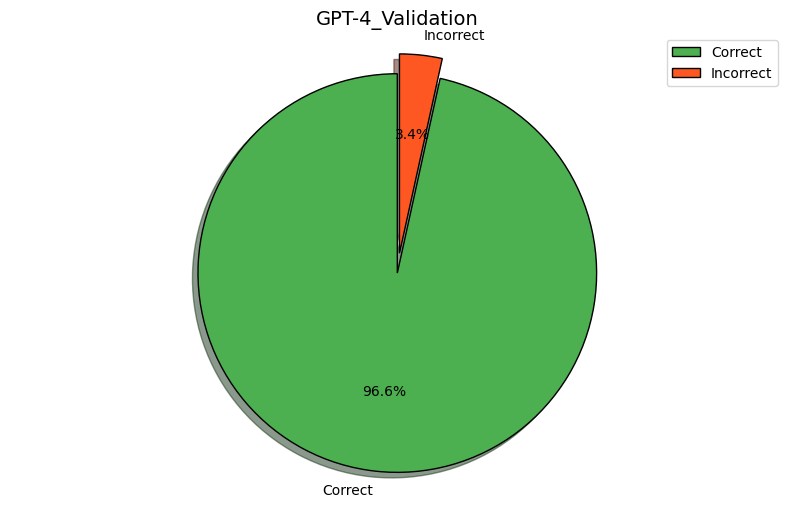

In [7]:
# Call the helper function
plot_gpt_validation_pie_chart(analysis_df, 'GPT-4_Validation')

# 6. COMPARISON ANALYSIS

In [9]:
#Load manual analysis data
analysis_df_15k = pd.read_csv('15 - API OpenAI_Cost_Analysis.csv')

# Display the result
print(analysis_df_15k.shape)

analysis_df_15k.head()

(2, 10)


,model_name,total_cost,processing_time_secs,processing_time_mins,processing_time_hours,cost_per_hour,total_records,cost_per_record,processing_secs_per_record,model_accuracy
0,gpt-3.5,0.75,6180,103.00,1.716667,0.436893,14608,0.000051,0.423056,0.4690
1,gpt-4,13.95,9765,162.75,2.712500,5.142857,14608,0.000955,0.668469,0.9655


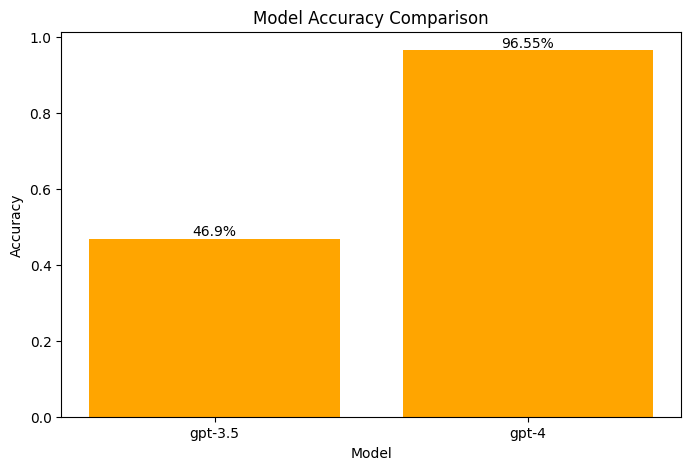

In [11]:
#A bar chart that compares the models in column 'model_name' for "model_accuracy"

import pandas as pd
import matplotlib.pyplot as plt
def plot_model_accuracy_comparison(df, model_column, accuracy_column):
    """
    Creates and displays a bar chart that shows the accuracy for models in the given DataFrame.
    Includes a label on each bar with the accuracy as a percentage and rounds to 2 decimal places.
    The bars are colored green.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    model_column (str): The name of the column containing model names.
    accuracy_column (str): The name of the column containing the accuracy values.
    """
    # Extract data from DataFrame
    labels = df[model_column]
    accuracies = df[accuracy_column]

    # Configure plot
    plt.figure(figsize=(8, 5))

    # Create bar chart
    plt.bar(labels, accuracies, color='orange')

    # Add labels and formatting
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy, f'{round(accuracy * 100, 2)}%', ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')

    # Show plot
    plt.show()


# Call the helper function
plot_model_accuracy_comparison(analysis_df_15k, 'model_name', 'model_accuracy')



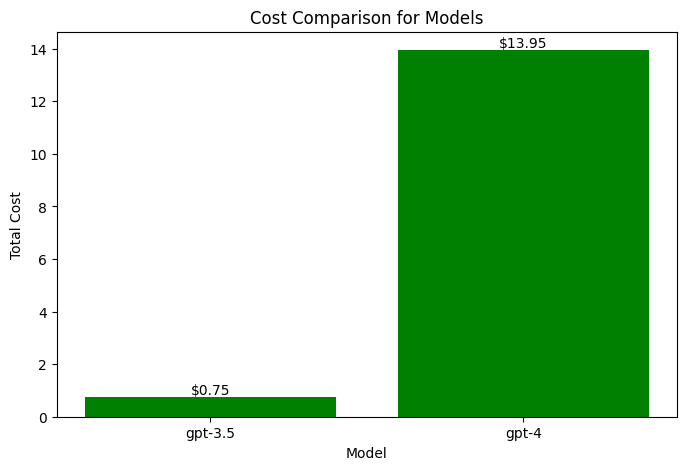

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_cost_comparison(df, model_column, cost_column):
    """
    Creates and displays a bar chart that shows the cost for models gpt-3.5 and gpt-4 
    next to each other from the given DataFrame. Includes a label on each bar with 
    a dollar sign and rounds to 2 decimal places. The bars are colored green.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    model_column (str): The name of the column containing model names.
    cost_column (str): The name of the column containing the costs.
    """
    # Extract data from DataFrame
    labels = df[model_column]
    costs = df[cost_column]

    # Configure plot
    plt.figure(figsize=(8, 5))

    # Create bar chart
    plt.bar(labels, costs, color='g')

    # Add labels and formatting
    for i, cost in enumerate(costs):
        plt.text(i, cost, f'${round(cost, 2)}', ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Total Cost')
    plt.title('Cost Comparison for Models')

    # Show plot
    plt.show()



# Call the helper function
plot_model_cost_comparison(analysis_df_15k, 'model_name', 'total_cost')

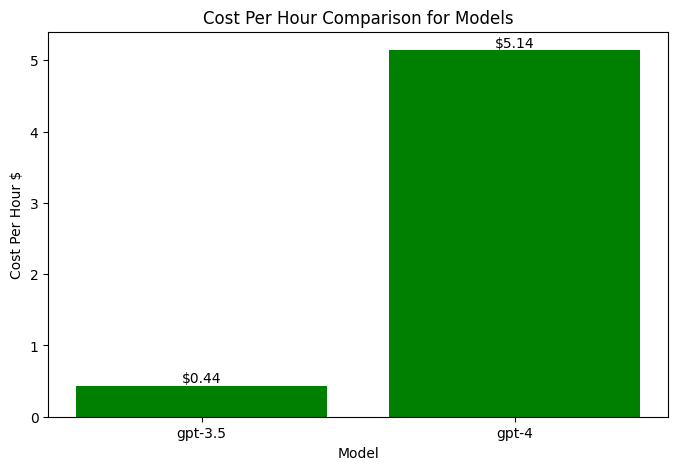

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_cost_comparison(df, model_column, cost_column):
    """
    Creates and displays a bar chart that shows the cost for models gpt-3.5 and gpt-4 
    next to each other from the given DataFrame. Includes a label on each bar with 
    a dollar sign and rounds to 2 decimal places. The bars are colored green.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    model_column (str): The name of the column containing model names.
    cost_column (str): The name of the column containing the costs.
    """
    # Extract data from DataFrame
    labels = df[model_column]
    costs = df[cost_column]

    # Configure plot
    plt.figure(figsize=(8, 5))

    # Create bar chart
    plt.bar(labels, costs, color='g')

    # Add labels and formatting
    for i, cost in enumerate(costs):
        plt.text(i, cost, f'${round(cost, 2)}', ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Cost Per Hour $')
    plt.title('Cost Per Hour Comparison for Models')

    # Show plot
    plt.show()



# Call the helper function
plot_model_cost_comparison(analysis_df_15k, 'model_name', 'cost_per_hour')

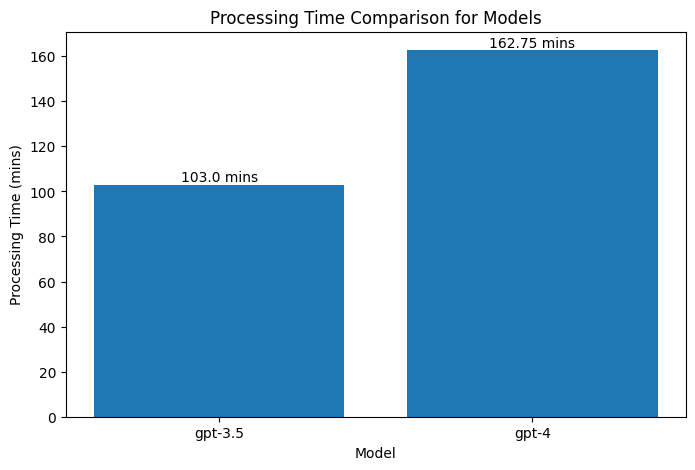

In [13]:
# prompt: Create a bar chart that compares the models in column 'model_name' for "processing_time_mins"

import pandas as pd
import matplotlib.pyplot as plt
def plot_model_time_comparison(df, model_column, time_column):
    """
    Creates and displays a bar chart that shows the time for models gpt-3.5 and gpt-4 
    next to each other from the given DataFrame. Includes a label on each bar with 
    the time in minutes and rounds to 2 decimal places. The bars are colored green.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    model_column (str): The name of the column containing model names.
    time_column (str): The name of the column containing the processing time in minutes.
    """
    # Extract data from DataFrame
    labels = df[model_column]
    times = df[time_column]

    # Configure plot
    plt.figure(figsize=(8, 5))

    # Create bar chart
    plt.bar(labels, times) #, color='b'

    # Add labels and formatting
    for i, time in enumerate(times):
        plt.text(i, time, f'{round(time, 2)} mins', ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Processing Time (mins)')
    plt.title('Processing Time Comparison for Models')

    # Show plot
    plt.show()





# Call the helper function
plot_model_time_comparison(analysis_df_15k, 'model_name', 'processing_time_mins')


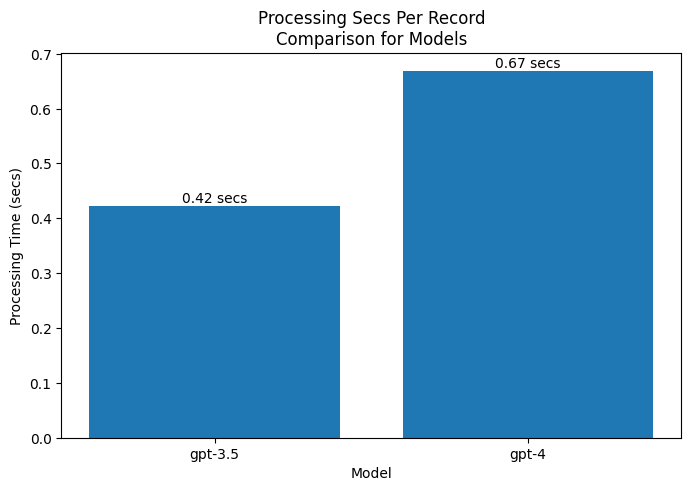

In [17]:
# prompt: Create a bar chart that compares the models in column 'model_name' for "processing_time_mins"

import pandas as pd
import matplotlib.pyplot as plt
def plot_model_time_comparison(df, model_column, time_column):
    """
    Creates and displays a bar chart that shows the time for models gpt-3.5 and gpt-4 
    next to each other from the given DataFrame. Includes a label on each bar with 
    the time in minutes and rounds to 2 decimal places. The bars are colored green.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    model_column (str): The name of the column containing model names.
    time_column (str): The name of the column containing the processing time in minutes.
    """
    # Extract data from DataFrame
    labels = df[model_column]
    times = df[time_column]

    # Configure plot
    plt.figure(figsize=(8, 5))

    # Create bar chart
    plt.bar(labels, times) #, color='b'

    # Add labels and formatting
    for i, time in enumerate(times):
        plt.text(i, time, f'{round(time, 2)} secs', ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Processing Time (secs)')
    plt.title('Processing Secs Per Record\nComparison for Models')

    # Show plot
    plt.show()





# Call the helper function
plot_model_time_comparison(analysis_df_15k, 'model_name', 'processing_secs_per_record')
